In [35]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

%matplotlib inline

In [36]:
data = pd.read_csv('sample_transations.csv', header=0)
data = data.drop('Unnamed: 0', axis=1)
data

dd_card_number  store_number  dd_transaction_number  sku  quantity  \
0                   0           775                   7969   74         1   
1                   0           775                   7969   73         1   
2                   0           761                  16021   75         1   
3                   0           761                  16021   50         1   
4                   0           761                  16021   50         1   
...               ...           ...                    ...  ...       ...   
51934              99           172                   8155   75         1   
51935              99           172                   8155  111         2   
51936              99           172                   8155  386         1   
51937              99           172                   8165   75         1   
51938              99           172                   8165  111         2   

       post_discount_price       date     hour dbi_item_catgry  \
0                     2.29   9/2/2015    Lunch       Beverages   
1                     0.00   9/2/2015    Lunch       Beverages   
2                     2.49   9/4/2015  Morning       Beverages   
3                     2.49   9/4/2015  Morning       Beverages   
4                     0.00   9/4/2015  Morning       Beverages   
...                    ...        ...      ...             ...   
51934                 2.49   7/9/2016  Morning       Beverages   
51935                 1.98   7/9/2016  Morning   Food - Bakery   
51936                 1.89   7/9/2016  Morning       Beverages   
51937                 2.49  7/11/2016    Night       Beverages   
51938                 1.98  7/11/2016    Night   Food - Bakery   

      dbi_item_sub_catgry dbi_item_famly_name dbi_item_size  
0              Hot Coffee          Hot Coffee         Large  
1              Hot Coffee          Hot Coffee        Medium  
2              Hot Coffee          Hot Coffee       X-Large  
3              Hot Coffee          Hot Coffee       X-Large  
4              Hot Coffee          Hot Coffee       X-Large  
...                   ...                 ...           ...  
51934          Hot Coffee          Hot Coffee       X-Large  
51935     Donut Varieties   Traditional Donut       1 Donut  
51936    Cooler Beverages               Sport         Sport  
51937          Hot Coffee          Hot Coffee       X-Large  
51938     Donut Varieties   Traditional Donut       1 Donut  

[51939 rows x 12 columns]

In [37]:
data['weekday'] = pd.to_datetime(data['date']).dt.weekday
data

dd_card_number  store_number  dd_transaction_number  sku  quantity  \
0                   0           775                   7969   74         1   
1                   0           775                   7969   73         1   
2                   0           761                  16021   75         1   
3                   0           761                  16021   50         1   
4                   0           761                  16021   50         1   
...               ...           ...                    ...  ...       ...   
51934              99           172                   8155   75         1   
51935              99           172                   8155  111         2   
51936              99           172                   8155  386         1   
51937              99           172                   8165   75         1   
51938              99           172                   8165  111         2   

       post_discount_price       date     hour dbi_item_catgry  \
0                     2.29   9/2/2015    Lunch       Beverages   
1                     0.00   9/2/2015    Lunch       Beverages   
2                     2.49   9/4/2015  Morning       Beverages   
3                     2.49   9/4/2015  Morning       Beverages   
4                     0.00   9/4/2015  Morning       Beverages   
...                    ...        ...      ...             ...   
51934                 2.49   7/9/2016  Morning       Beverages   
51935                 1.98   7/9/2016  Morning   Food - Bakery   
51936                 1.89   7/9/2016  Morning       Beverages   
51937                 2.49  7/11/2016    Night       Beverages   
51938                 1.98  7/11/2016    Night   Food - Bakery   

      dbi_item_sub_catgry dbi_item_famly_name dbi_item_size  weekday  
0              Hot Coffee          Hot Coffee         Large        2  
1              Hot Coffee          Hot Coffee        Medium        2  
2              Hot Coffee          Hot Coffee       X-Large        4  
3              Hot Coffee          Hot Coffee       X-Large        4  
4              Hot Coffee          Hot Coffee       X-Large        4  
...                   ...                 ...           ...      ...  
51934          Hot Coffee          Hot Coffee       X-Large        5  
51935     Donut Varieties   Traditional Donut       1 Donut        5  
51936    Cooler Beverages               Sport         Sport        5  
51937          Hot Coffee          Hot Coffee       X-Large        0  
51938     Donut Varieties   Traditional Donut       1 Donut        0  

[51939 rows x 13 columns]

In [38]:
data.describe()

dd_card_number  store_number  dd_transaction_number           sku  \
count    51939.000000  51939.000000           51939.000000  51939.000000   
mean        47.895551    694.159957           12187.554997    145.275284   
std         27.675001    401.041680            7098.416078    114.866060   
min          0.000000      0.000000               0.000000      0.000000   
25%         24.000000    373.000000            6035.000000     74.000000   
50%         50.000000    696.000000           12293.000000     89.000000   
75%         69.000000    990.000000           18404.500000    180.000000   
max         99.000000   1500.000000           24347.000000    619.000000   

           quantity  post_discount_price       weekday  
count  51939.000000         51939.000000  51939.000000  
mean       1.091473             1.986305      2.937504  
std        0.351701             1.635776      1.938020  
min        1.000000             0.000000      0.000000  
25%        1.000000             1.090000      1.000000  
50%        1.000000             1.990000      3.000000  
75%        1.000000             2.490000      5.000000  
max       16.000000            79.950000      6.000000

61    1198
53    1121
42    1118
9     1105
52    1015
      ... 
58     314
78     313
47     309
35     305
94     302
Name: dd_card_number, Length: 100, dtype: int64


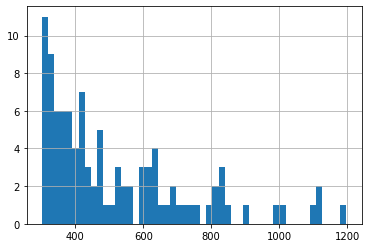

73     4835
74     4815
77     4066
111    3939
78     3473
       ... 
603       1
279       1
124       1
517       1
115       1
Name: sku, Length: 620, dtype: int64


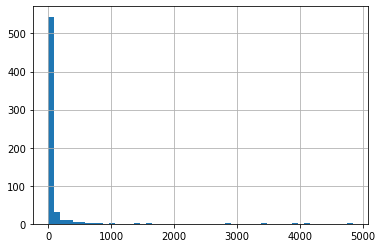

In [39]:
for column in ['dd_card_number', 'sku']:
    print(data[column].value_counts())
    data[column].value_counts().hist(bins=50)
    plt.show()

In [40]:
# dd_card_number - customer identifier (categorical)
# store_number - store identifier (categorical)
# dd_transaction_number - transaction identifier (categorical)
# sku - product identifier, may vary across different stores (categorical)
# quantity - quantity (numerical)
# post_discount_price - transaction price (numerical)
# date - transaction date 
# hour (categorical)
# dbi_item_catgry (categorical)
# dbi_item_sub_catgry (categorical)
# dbi_item_famly_name (categorical)
# dbi_item_size (categorical)


In [41]:
for hour in set(data['hour']):
    print(hour)
    print(data[data['hour'] == hour].groupby('sku').count()['date'])

Afternoon
sku
1      1
5      1
6      1
10     8
15     1
      ..
613    3
614    6
615    1
617    2
618    1
Name: date, Length: 309, dtype: int64
Lunch
sku
1       2
3      12
4       1
5       1
6      16
       ..
614     6
615     1
617     5
618     4
619     7
Name: date, Length: 424, dtype: int64
Morning
sku
0       2
1      21
2       1
3      24
4       3
       ..
614     9
615     2
616     3
617     4
619     8
Name: date, Length: 487, dtype: int64
Night
sku
5      1
18     1
19     5
45     1
46     1
      ..
604    9
605    1
607    1
616    1
617    1
Name: date, Length: 163, dtype: int64


dbi_item_sub_catgry
{'Hash Brown', 'Kolache', 'Desserts', 'Chicken Biscuit Sandwich', 'Iced Tea', 'Snack n Go Steak Wraps', 'Retail Merchandise', 'Sweet Black Pepper Bacon Sandwich', 'Gum', 'Belgian Waffle Breakfast Sandwich', 'Other Food- Bakery', 'Ham & Cheese Sandwich', 'Hot Tea', 'Tuna Sandwich', 'Chicken Apple Sausage Sandwich', 'Other Food PM', 'Smoked Sausage Sandwich', 'Bacon, Egg & Cheese', 'Ham, Egg & Cheese', 'Bacon Supreme Omelet Breakfast Sandwich', 'Wake Up Wraps', 'Turkey, Cheddar & Bacon Sandwich', 'Snack n Go Chicken Wraps', 'Hot Coffee', 'Iced Espresso', 'GranDDe Burrito', 'K-Cups', 'Pork Roll Breakfast Sandwich', 'Frozen Beverages', 'Turkey Sausage Sandwich', 'Iced Coffee', 'Chicken Salad Sandwich', 'Egg & Cheese', 'Egg White Flatbreads', 'Muffin', 'Oatmeal', 'Hot Espresso', 'Bananas', 'Steak, Egg & Cheese', 'Sausage Biscuit Sandwich', 'Maple Sausage Breakfast Sandwich', 'Grilled Cheese Sandwich', 'Tailgater Breakfast Sandwich', 'Donut Varieties', 'Cooler Beverages',

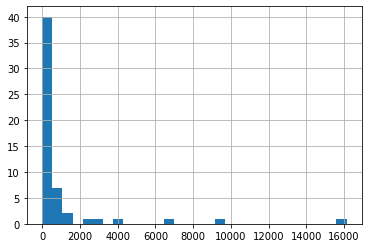

dbi_item_famly_name
{'Hash Brown', 'Cappuccino', 'Maple Brown Sugar', 'Frozen Dunkaccino', 'Milk', 'K-Cups, Dark Roast', 'Snack n Go Steak Wraps', '3 lbs', 'Roll', 'Topped Bagels', 'Cream Cheese', 'Wake Up Wrap (Meat)', 'Shake', 'GranDDe Burrito', 'Pork Roll Breakfast Sandwich', '1 Fried Egg', 'Large Kolache', 'Sweet Tea', 'Pie', 'Espresso', 'Cookies', 'Plain', 'K-Cups, Hot Cocoa', 'Hot Apple Cider', 'Tailgater Breakfast Sandwich', 'Fancies', 'Water', 'Iced Apple Cider', 'Sport', 'Bagel Twist', 'Soda', 'Sweet Black Pepper Bacon Sandwich', 'Gum', 'Yellow, Scrambled Egg (Steak & Cheese)', 'Hot Tea', 'Munchkins', 'Sweet Tea Lemonade', 'Tuna Melt', 'Hot Coffee', 'Smoothie', 'Iced Latte', 'Turkey Sausage Sandwich', 'Chicken Salad Sandwich', 'Koozie', 'Muffin', 'Pretzel', '2 Fried Eggs (Big n Toasted)', 'Hot Chocolate', 'Bananas', '1 lb', 'Coffee Canister', 'Grilled Cheese Sandwich', 'Egg White, Veggie (Bacon, Egg & Cheese)', 'Juice', 'Traditional Donut', 'K-Cups, French Vanilla', 'Chicken C

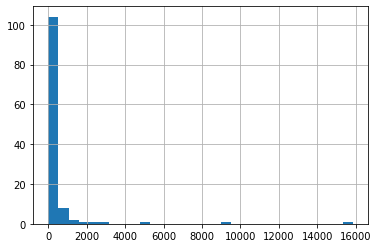

dbi_item_size
{'4 Muffins', 'Other Pies', 'Other Munchkin Sizes', 'Maple Brown Sugar', 'Cheesecake Donuts', 'X-Large', 'Milk', '3 lbs', '12 Donuts, Item Only', 'Fruit Topping', '1 Muffin', 'Veggie', 'Roll', 'Supreme Bagel', 'Twist', '1 Donut', 'English Muffin', 'Espresso', 'Breaded Chicken Wrap', 'Flat', 'K-Cups, Pumpkin 12 Count', 'Biscuit', 'Refill', 'Plain', '6 Bagels', 'Add a Hash  Brown', '1 Kolache', '12 Bagels', 'K-Cups, Dark Roast 12 Count', '1 Croissant', 'Acrylic Tumblers', 'Water', 'Sport', 'Steak Wrap', 'Bagel Twist', '4 Munchkins', 'Soda', 'Gum', 'Grab & Go', 'Other Square Donuts LTOs', '5 Munchkins', 'Sausage', '1 Croissant Donut', 'K-Cups, Original 12 Count', '1 Cookie', '6 Hash Browns', 'Other Bagel Sizes', '6 Muffins', 'Plastic Travel Mug', 'Koozie', 'Bananas', '1 lb', 'Coffee Canister', 'Juice', 'Bagel Twist w. CC', 'Waffle', 'Retail Merchandise - Other', 'Pretzel Roll', 'Multigrain', 'Hot Coffee Coupon Book', 'Cones', 'Bagel Twist Warmed', 'Wrap', 'Other Food- Bakery

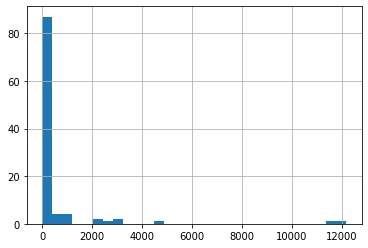

In [42]:
for feature in ['dbi_item_sub_catgry', 'dbi_item_famly_name', 'dbi_item_size']:
    print(feature)
    print(set(data[feature]))
    print(len(set(data[feature])))
    print(data[feature].value_counts().head(20))
    data[feature].value_counts().hist(bins=30)
    plt.show()

In [43]:
data.groupby(['sku'])['dbi_item_catgry'].agg(pd.Series.mode)

sku
0      Food - Bakery
1      Food - Bakery
2      Food - Bakery
3      Food - Bakery
4      Food - Bakery
           ...      
615        Beverages
616    Food - Bakery
617    Food - Bakery
618        Beverages
619    Food - Bakery
Name: dbi_item_catgry, Length: 620, dtype: object

In [44]:
def add_cat_feature(df_main, df_other, feature):
    dummies = pd.get_dummies(df_other[feature], prefix=feature)
    dummies_big = dummies[number_of_true.index[:number_of_values]]
    return pd.concat([df_main, dummies_big], axis=1)

In [45]:
products = pd.DataFrame(index = np.sort(data['sku'].value_counts().index))

for feature in [
    'dbi_item_catgry', 
#     'dbi_item_sub_catgry'
    ]:
    dummies = pd.get_dummies(data.groupby(['sku'])[feature].agg(pd.Series.mode), prefix=feature)
    products = pd.concat([products, dummies], axis=1)
    

products['median_price'] = data.groupby('sku').median()['post_discount_price']
products['mean_price'] = data.groupby('sku').mean()['post_discount_price']
products['max_price'] = data.groupby('sku').max()['post_discount_price']
products['mean_quantity'] = data.groupby('sku').median()['quantity']
products['max_quantity'] = data.groupby('sku').max()['quantity']
products['different_stores'] = data.groupby('sku').count()['store_number']
products['different_customers'] = data.groupby('sku').count()['dd_card_number']

for hour in set(data['hour']):
    products[f'purchases_at_{hour}'] = \
    data[data['hour'] == hour].groupby('sku').count()['date']
    
for weekday in set(data['weekday']):
    products[f'purchases_at_{weekday}_weekday'] = \
    data[data['weekday'] == weekday].groupby('sku').count()['date']
    

for size in ['Small', 'Medium', 'Large', 'X-Large']:
    products[f'size_{size}'] = \
    data[data['dbi_item_size'] == size].groupby('sku').count()['date']

    



    
products = products.fillna(0)
print(products.describe())
products

       dbi_item_catgry_Beverages  dbi_item_catgry_Food - Bakery  \
count                 620.000000                     620.000000   
mean                    0.391935                       0.270968   
std                     0.488577                       0.444818   
min                     0.000000                       0.000000   
25%                     0.000000                       0.000000   
50%                     0.000000                       0.000000   
75%                     1.000000                       1.000000   
max                     1.000000                       1.000000   

       dbi_item_catgry_Food AM  dbi_item_catgry_Food PM  \
count               620.000000               620.000000   
mean                  0.217742                 0.067742   
std                   0.413044                 0.251505   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000            

dbi_item_catgry_Beverages  dbi_item_catgry_Food - Bakery  \
0                            0                              1   
1                            0                              1   
2                            0                              1   
3                            0                              1   
4                            0                              1   
..                         ...                            ...   
615                          1                              0   
616                          0                              1   
617                          0                              1   
618                          1                              0   
619                          0                              1   

     dbi_item_catgry_Food AM  dbi_item_catgry_Food PM  dbi_item_catgry_Other  \
0                          0                        0                      0   
1                          0                        0                      0   
2                          0                        0                      0   
3                          0                        0                      0   
4                          0                        0                      0   
..                       ...                      ...                    ...   
615                        0                        0                      0   
616                        0                        0                      0   
617                        0                        0                      0   
618                        0                        0                      0   
619                        0                        0                      0   

     median_price  mean_price  max_price  mean_quantity  max_quantity  ...  \
0            0.00      0.0000       0.00            1.0             1  ...   
1            0.00      0.0000       0.00            1.0             4  ...   
2            0.00      0.0000       0.00            1.0             1  ...   
3            0.00      0.0000       0.00            1.0             6  ...   
4            0.00      0.0000       0.00            1.0             2  ...   
..            ...         ...        ...            ...           ...  ...   
615          1.78      1.7800       3.56            1.0             1  ...   
616          1.49      1.4900       1.49            1.0             1  ...   
617          2.49      2.7225       4.98            1.0             2  ...   
618          2.99      2.3920       2.99            1.0             1  ...   
619          1.79      1.7720       1.79            1.0             1  ...   

     purchases_at_1_weekday  purchases_at_2_weekday  purchases_at_3_weekday  \
0                       1.0                     0.0                     0.0   
1                       3.0                     3.0                     5.0   
2                       0.0                     0.0                     0.0   
3                       2.0                     7.0                     4.0   
4                       0.0                     0.0                     0.0   
..                      ...                     ...                     ...   
615                     1.0                     0.0                     0.0   
616                     0.0                     0.0                     0.0   
617                     3.0                     2.0                     2.0   
618                     0.0                     0.0                     0.0   
619                     3.0                     1.0                     4.0   

     purchases_at_4_weekday  purchases_at_5_weekday  purchases_at_6_weekday  \
0                       0.0                     1.0                     0.0   
1                       4.0                     3.0                     2.0   
2                       0.0                     1.0                     0.0   
3                       8.0                     7.0          

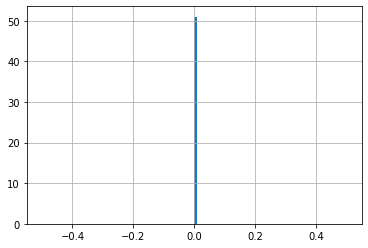

In [12]:
products[(products['size_Small'] != 0) & (products['size_Medium'] <100000)]['size_Medium'].hist(bins=100)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features


def find_feature_ranking(n_clusters: int, X, y, info='', n_best=5, draw=False):
    # Build a forest and compute the impurity-based feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(min(X.shape[1], n_best)):
#         if importances[indices[f]] > 0.01:
        print("%d. feature %d - %s (%f)" % (f + 1, indices[f], products.columns[indices[f]], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    if draw:
        plt.figure()
        plt.title(f"Feature importances {info}")
        plt.bar(range(X.shape[1]), importances[indices],
                color="r", yerr=std[indices], align="center", label=info)
        plt.xticks(range(X.shape[1]), indices)
        plt.xlim([-1, X.shape[1]])
        plt.legend(loc='best')
        plt.show()
#         plt.savefig(f'importance/Feature_importances_from_{n_clusters}_clusters_{cluster_index}_cluster.png')
    return importances

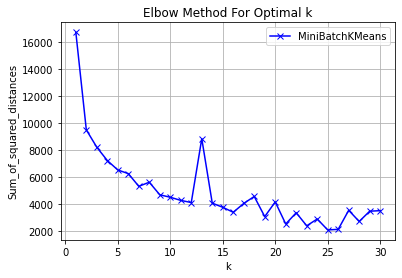

In [14]:
from itertools import cycle, islice
from sklearn.decomposition import PCA

from sklearn.cluster import MiniBatchKMeans, SpectralClustering, DBSCAN

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(100 + 1))))

scaler = StandardScaler()
X = scaler.fit_transform(products)


cluster_sizes = [1,2,3,4,5,8,12,17,25,30]
cluster_sizes = np.arange(1,31)
clustering_algorithms = [
        ('MiniBatchKMeans', MiniBatchKMeans(n_clusters=k, n_init=35), k) for k in cluster_sizes
] #+ [
#     ('SpectralClustering', SpectralClustering(
#         n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors"
#         ), k) for k in cluster_sizes
# ]

Sum_of_squared_distances = {
    'MiniBatchKMeans': [],
#     'SpectralClustering': []
}


for name, algorithm, n_clusters in clustering_algorithms:
    np.random.seed(5757)
    algorithm.fit(X)
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)
#     plt.title(f'{name}, size={n_clusters}', size=14)
#     plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, color=colors[y_pred])
#     plt.show()
    Sum_of_squared_distances[name].append(algorithm.inertia_)
    
# DBSCAN(eps=params['eps'])

for name, dists in Sum_of_squared_distances.items():
    plt.plot(cluster_sizes, dists, 'bx-', label=name)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.legend(loc='best')
plt.grid()
plt.show()
    


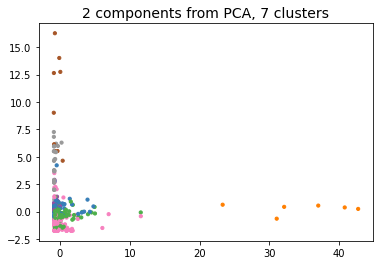

In [15]:
best_n_clusters = 7


mean_values_in_clusters = pd.DataFrame(columns = products.columns)

clustering_algorithms = [
        ('MiniBatchKMeans', MiniBatchKMeans(n_clusters=k, n_init=35), k) for k in cluster_sizes
] #+ [
#     ('SpectralClustering', SpectralClustering(
#         n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors"
#         ), k) for k in cluster_sizes
# ]

Sum_of_squared_distances = {
    'MiniBatchKMeans': [],
#     'SpectralClustering': []
}


pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# for name, algorithm, n_clusters in clustering_algorithms:
name, algorithm, n_clusters = 'MiniBatchKMeans', MiniBatchKMeans(n_clusters=best_n_clusters, n_init=35), best_n_clusters
np.random.seed(5757)
algorithm.fit(X)
if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)
plt.title(f'2 components from PCA, {n_clusters} clusters', size=14)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, color=colors[y_pred])
plt.show()



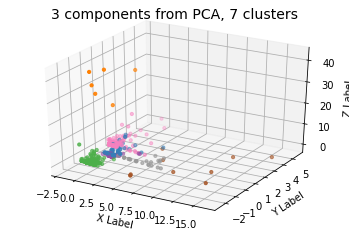

In [16]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pca_3 = PCA(n_components=3)
pca_3.fit(X)
X_pca_3 = pca_3.transform(X)

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
ax.scatter(X_pca_3[:, 1], X_pca_3[:, 2], X_pca_3[:, 0], s=10, color=colors[y_pred])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title(f'3 components from PCA, {n_clusters} clusters', size=14)


plt.show()


In [17]:
for cluster in range(n_clusters):
    print('='*10)
    print(f'cluster {cluster+1}/{n_clusters}, size {(y_pred == cluster).sum()}')
    y = np.vectorize(int)(y_pred == cluster)
    importances = find_feature_ranking(n_clusters, X, y, n_best=5, draw=False, 
                                      info=f'cluster {cluster}/{n_clusters}')
    best_features = [products.columns[np.argsort(importances)[::-1][i]] for i in range(5)]
#         plt.title(f'{name}, cluster {cluster}/{n_clusters}', size=14)
#         plt.scatter(X[:, np.argsort(importances)[::-1][0]],
#                     X[:, np.argsort(importances)[::-1][1]],
#                     s=10, color=colors[y])
#         plt.xlabel(best_features[0])
#         plt.ylabel(best_features[1])
#         plt.show()
    print(
        pd.DataFrame([
            products[best_features][y_pred == cluster].mean(axis=0),
            products[best_features][y_pred != cluster].mean(axis=0)
        ]).transpose()
        )
    if cluster == 1:
        print(data.groupby('sku').agg(pd.Series.mode)['dbi_item_famly_name'][y_pred == cluster])

cluster 1/7, size 135
Feature ranking:
1. feature 2 - dbi_item_catgry_Food AM (0.660861)
2. feature 0 - dbi_item_catgry_Beverages (0.141305)
3. feature 1 - dbi_item_catgry_Food - Bakery (0.105573)
4. feature 3 - dbi_item_catgry_Food PM (0.030954)
5. feature 4 - dbi_item_catgry_Other (0.022157)
                                 0         1
dbi_item_catgry_Food AM        1.0  0.000000
dbi_item_catgry_Beverages      0.0  0.501031
dbi_item_catgry_Food - Bakery  0.0  0.346392
dbi_item_catgry_Food PM        0.0  0.086598
dbi_item_catgry_Other          0.0  0.065979
cluster 2/7, size 6
Feature ranking:
1. feature 22 - purchases_at_6_weekday (0.118206)
2. feature 19 - purchases_at_3_weekday (0.090949)
3. feature 11 - different_customers (0.090242)
4. feature 10 - different_stores (0.087803)
5. feature 21 - purchases_at_5_weekday (0.087354)
                                  0          1
purchases_at_6_weekday   454.000000   5.343648
purchases_at_3_weekday   590.000000   6.687296
different_custom

## Recommendation system

In [119]:
frequent_items = data['dbi_item_famly_name'].value_counts().head(75).index.values
frequent_items

array(['Hot Coffee', 'Iced Coffee', 'Traditional Donut', 'Muffin',
       'Bagels w/out Spread', 'Wake Up Wrap (Meat)', 'Bagels w/Spread',
       'Hash Brown', 'Iced Tea', 'Iced Latte', 'Munchkins',
       'Yellow, Scrambled Egg (Bacon, Egg & Cheese)', 'Hot Tea',
       'Fancies', 'Yellow, Scrambled Egg (Egg & Cheese)',
       'Yellow, Scrambled Egg (Sausage, Egg & Cheese)',
       'Wake Up Wrap (No Meat)', 'Coolatta', 'Hot Chocolate', 'Espresso',
       'Veggie Egg White Flatbread', 'Almond Milk', 'Smoothie',
       'Iced Macchiato', 'Turkey Sausage Sandwich', 'Latte', 'Water',
       'Juice', 'Roll', 'Square Donuts', 'Chicken Salad Sandwich', 'Milk',
       'Yellow, Scrambled Egg (Ham, Egg & Cheese)', 'Croissants',
       'Cold Brew Coffee', 'K-Cups, Original', 'Macchiato',
       'Turkey, Cheddar & Bacon Sandwich', 'Chicken Bacon Sandwich',
       'Bagel Twist', 'Croissant Donuts', 'Frozen Dunkaccino', 'Soda',
       'Other Food- Bakery', 'Sweet Black Pepper Bacon Sandwich',
       

In [120]:
frequent_data = data[data['dbi_item_famly_name'].apply(lambda x: x in frequent_items)]
frequent_data

dd_card_number  store_number  dd_transaction_number  sku  quantity  \
0                   0           775                   7969   74         1   
1                   0           775                   7969   73         1   
2                   0           761                  16021   75         1   
3                   0           761                  16021   50         1   
4                   0           761                  16021   50         1   
...               ...           ...                    ...  ...       ...   
51934              99           172                   8155   75         1   
51935              99           172                   8155  111         2   
51936              99           172                   8155  386         1   
51937              99           172                   8165   75         1   
51938              99           172                   8165  111         2   

       post_discount_price       date     hour dbi_item_catgry  \
0                     2.29   9/2/2015    Lunch       Beverages   
1                     0.00   9/2/2015    Lunch       Beverages   
2                     2.49   9/4/2015  Morning       Beverages   
3                     2.49   9/4/2015  Morning       Beverages   
4                     0.00   9/4/2015  Morning       Beverages   
...                    ...        ...      ...             ...   
51934                 2.49   7/9/2016  Morning       Beverages   
51935                 1.98   7/9/2016  Morning   Food - Bakery   
51936                 1.89   7/9/2016  Morning       Beverages   
51937                 2.49  7/11/2016    Night       Beverages   
51938                 1.98  7/11/2016    Night   Food - Bakery   

      dbi_item_sub_catgry dbi_item_famly_name dbi_item_size  weekday  
0              Hot Coffee          Hot Coffee         Large        2  
1              Hot Coffee          Hot Coffee        Medium        2  
2              Hot Coffee          Hot Coffee       X-Large        4  
3              Hot Coffee          Hot Coffee       X-Large        4  
4              Hot Coffee          Hot Coffee       X-Large        4  
...                   ...                 ...           ...      ...  
51934          Hot Coffee          Hot Coffee       X-Large        5  
51935     Donut Varieties   Traditional Donut       1 Donut        5  
51936    Cooler Beverages               Sport         Sport        5  
51937          Hot Coffee          Hot Coffee       X-Large        0  
51938     Donut Varieties   Traditional Donut       1 Donut        0  

[51772 rows x 13 columns]

In [121]:
user_item_score = frequent_data.groupby(
    ['dd_card_number', 'dbi_item_famly_name']
)['dbi_item_famly_name'].count().to_frame(name='count').reset_index()
# user_item_score['user'] = user_item_score.index[:]
user_item_score = user_item_score.rename(columns={'dd_card_number': 'user', 
                                                  'dbi_item_famly_name': 'item',
                                                  'count': 'score'})
user_item_score

user                                         item  score
0        0                              Bagels w/Spread      1
1        0                                      Cookies      1
2        0                             Croissant Donuts      1
3        0                                      Fancies      1
4        0                                Hot Chocolate      4
...    ...                                          ...    ...
2159    99                                         Soda      5
2160    99                                        Sport      3
2161    99                            Traditional Donut    104
2162    99  Yellow, Scrambled Egg (Bacon, Egg & Cheese)      2
2163    99    Yellow, Scrambled Egg (Ham, Egg & Cheese)      1

[2164 rows x 3 columns]

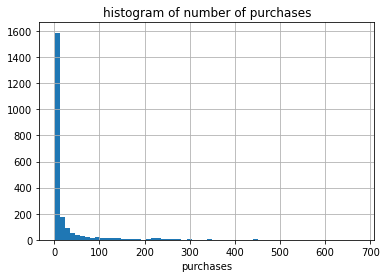

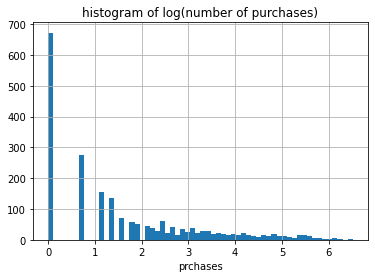

In [122]:
user_item_score['score'].hist(bins=60)
plt.title('histogram of number of purchases')
plt.xlabel('purchases')
plt.show()

np.log(user_item_score['score']).hist(bins=60)
plt.title('histogram of log(number of purchases)')
plt.xlabel('prchases')
plt.show()

In [123]:
user_item_score['score'] = np.log(user_item_score['score'])

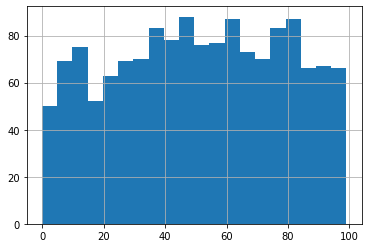

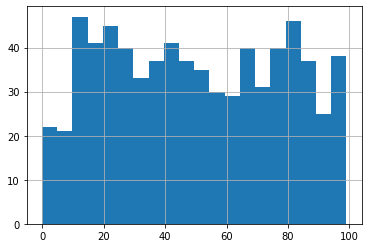

user                                     item     score
1000    47                               Hot Coffee  4.718499
1383    64                   Chicken Salad Sandwich  4.779123
2054    94                                   Muffin  5.111988
1302    60                        Traditional Donut  2.564949
1228    58                      Bagels w/out Spread  2.833213
...    ...                                      ...       ...
1638    75                  Turkey Sausage Sandwich  1.386294
1095    52  Bacon Supreme Omelet Breakfast Sandwich  0.000000
1130    53                                     1 lb  0.693147
1294    60                               Iced Latte  5.560682
860     42                               Hash Brown  1.098612

[1449 rows x 3 columns]

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(user_item_score, test_size=0.33, random_state=42)
X_train['user'].hist(bins=20)
plt.show()
X_test['user'].hist(bins=20)
plt.show()
X_train

In [125]:
user_item_score['score'].max()

6.51471269087253

In [126]:
from surprise import Dataset
from surprise import Reader

reader = Reader(rating_scale=(0, user_item_score['score'].max()))

# Loads Pandas dataframe
data_train = Dataset.load_from_df(X_train, reader)
data_test = Dataset.load_from_df(X_test, reader)

In [127]:
from surprise import KNNWithMeans
from sklearn.metrics import mean_squared_error as MSE

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

algo.fit(data_train.build_full_trainset())

prediction = algo.predict(X_test['user'].values[0], X_test['item'].values[0])
y_pred = [algo.predict(X_test['user'].values[i], X_test['item'].values[i]).est for i in range(len(X_test))]
# X_test['pred'] = np.array(y_pred)
MSE(X_test['score'], y_pred)

Computing the cosine similarity matrix...
Done computing similarity matrix.


/home/aesotskij/.local/lib/python3.6/site-packages/surprise/prediction_algorithms/algo_base.py:248: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


1.6571154943209419

In [128]:
from surprise.model_selection import GridSearchCV

sim_options = {
    "k": [5, 8, 10, 20, 40, 100],
    "min_k": [1, 2, 5],
    "name": ["msd", "cosine"],
    "min_support": [2, 3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data_train)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

/home/aesotskij/.local/lib/python3.6/site-packages/surprise/prediction_algorithms/algo_base.py:248: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine 

Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computin

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [129]:
best_params = {'sim_options': {'k': 5, 'min_k': 1, 'name': 'msd', 'min_support': 2, 'user_based': False}}
algo = KNNWithMeans(sim_options=best_params['sim_options'])

algo.fit(data_train.build_full_trainset())

# prediction = algo.predict(X_test['user'].values[0], X_test['item'].values[0])
y_pred = [algo.predict(X_test['user'].values[i], X_test['item'].values[i]).est for i in range(len(X_test))]
# X_test['pred'] = np.array(y_pred)
MSE(X_test['score'], y_pred)

Computing the msd similarity matrix...
Done computing similarity matrix.


1.663952071774281

6


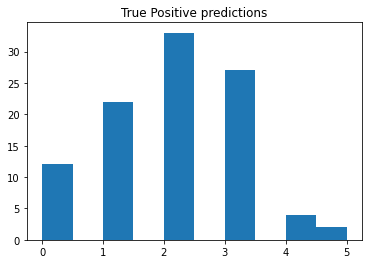

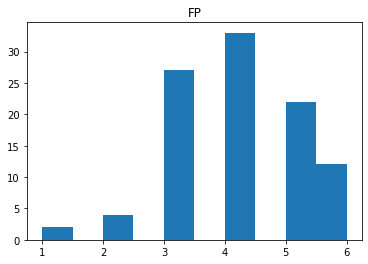

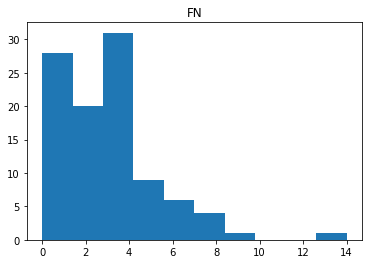

precision: 0.325 
recall: 0.3971486761710794 
F1: 0.3574702108157654
['Hot Coffee' '4.064101488641525']
['Biscuits' '2.5649493574615367']
['Muffin' '2.1892053775864966']
['Wake Up Wrap (Meat)' '2.0797649144501507']
['Bagels w/out Spread' '2.0675342909693057']
['Bagels w/Spread' '1.6671274348148042']
     user                          item     score
199    11                    Hot Coffee  5.342334
211    11           Wake Up Wrap (Meat)  3.526361
203    11                        Muffin  2.564949
212    11        Wake Up Wrap (No Meat)  1.386294
210    11    Veggie Egg White Flatbread  1.386294
187    11        Chicken Bacon Sandwich  1.386294
188    11        Chicken Salad Sandwich  1.098612
184    11               Bagels w/Spread  0.693147
196    11       Grilled Cheese Sandwich  0.693147
185    11           Bagels w/out Spread  0.693147
205    11  Tailgater Breakfast Sandwich  0.693147
['Hot Coffee' '4.1298226338774295']
['Iced Coffee' '3.068367617797276']
['Traditional Donut' '2.716

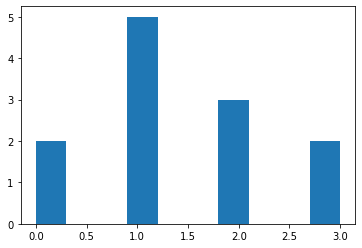

In [130]:
def recommend(user, frequent_items, algo, X_train, n_best=5):
    X_user = X_train[X_train['user'] == user]
    predictions = [algo.predict(user, item ).est for item in frequent_items]
    preds = pd.Series(predictions, index=frequent_items).sort_values(ascending=False)
#     print(preds)
    best_pred = []
    for item, prediction in preds.items():
        if len(X_user[X_user['item'] == item]) == 0:
            best_pred.append([item, prediction])
        if len(best_pred) >= n_best:
            break
    return np.array(best_pred)


n_users = len(set(user_item_score['user']))
users = np.arange(n_users)

# for n_best in np.arange(1, 15):
n_best = 6

np.random.seed(5757)

TP, FN, FP = [], [], []
print(n_best)
for user in range(n_users):
#     print('='*10)
    recommendations = recommend(user, frequent_items, algo, X_train, n_best=n_best)
#     for rec in recommendations:
#         print(rec)
    items_true = X_test[(X_test['user'] == user) & (X_test['score'] > 0)].sort_values(by='score',ascending=False)
#     print(items_true)
    set_pred = set(recommendations[:,0])
    set_true = set(items_true['item'])

#     print(set_pred, set_true)
#     print(set_true.intersection(set_pred))
    tp = len(set_true.intersection(set_pred))
    fp = len(set_pred) - tp
    fn = len(set_true) - tp
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)

TP = np.array(TP)
FP = np.array(FP)
FN = np.array(FN)

plt.hist(TP)
plt.title('True Positive predictions')
plt.show()

plt.hist(FP)
plt.title('FP')
plt.show()

plt.hist(FN)
plt.title('FN')
plt.show()

precision = TP.sum() / (TP.sum() + FP.sum())
recall = TP.sum() / (TP.sum() + FN.sum())
F1 = 2 * precision * recall / (precision + recall)
print(f'precision: {precision} \nrecall: {recall} \nF1: {F1}')

for user in users[TP == 5]:
    recommendations = recommend(user, frequent_items, algo, X_train, n_best=n_best)
    for rec in recommendations:
        print(rec)
    items_true = X_test[(X_test['user'] == user) & (X_test['score'] > 0)].sort_values(by='score',ascending=False)
    print(items_true)
    set_pred = set(recommendations[:,0])
    set_true = set(items_true['item'])

zero_lens = []
for user in users[TP == 0]:
    items_true = X_test[(X_test['user'] == user) & (X_test['score'] > 0)].sort_values(by='score',ascending=False)
    zero_lens.append(len(items_true))
    if len(items_true) == 0:
        print('!!!!!!!')
        continue
    print('='*10)
    recommendations = recommend(user, frequent_items, algo, X_train, n_best=n_best)
    for rec in recommendations:
        print(rec)
    
    print(items_true)
    set_pred = set(recommendations[:,0])
    set_true = set(items_true['item'])

plt.hist(zero_lens)
plt.show()